<a href="https://colab.research.google.com/github/vananh09/Traffic_sign_detect_with_CNN/blob/main/TrafficsignDetectCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sử dụng bộ dữ liệu có sẵn được download từ link: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [10]:
from google.colab import drive 
drive.mount('/content/drive')
!unzip -u "/content/drive/My Drive/archive.zip" -d "/content/drive/My Drive"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/train/5/00005_00053_00010.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00011.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00012.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00013.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00014.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00015.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00016.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00017.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00018.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00019.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00020.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00021.png  
  inflating: /content/drive/My Drive/train/5/00005_00053_00022.png  
  inflating: /content/drive/My Drive/train/5/00005_0

In [51]:
!pip install tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


import các thư viện cần thiếtthiết

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

Đọc input đầu vào và chuyển chúng về dạng numpy arrayarray và lấy ngẫu nhiên hình ảnh đầu vàovào

In [53]:
# Reading the input images and putting them into a numpy array 
data=[] 
labels=[]  
height = 30
width = 30
channels = 3 
classes = 43 
n_inputs = height * width * channels  
for i in range(classes):     
  path = "/content/drive/MyDrive/ColabNotebooks/train/{0}/".format(i)
  print(path)
  Class=os.listdir(path)     
  for a in Class:         
    try:             
      image=cv2.imread(path+a)             
      image_from_array = Image.fromarray(image, 'RGB')             
      size_image = image_from_array.resize((height, width))             
      data.append(np.array(size_image))             
      labels.append(i)         
    except AttributeError:             
      print(" ")              
Cells=np.array(data) 
labels=np.array(labels)  
#Randomize the order of the input images 
s=np.arange(Cells.shape[0]) 
np.random.seed(43) 
np.random.shuffle(s) 
Cells=Cells[s] 
labels=labels[s]


/content/drive/MyDrive/ColabNotebooks/train/0/
/content/drive/MyDrive/ColabNotebooks/train/1/
/content/drive/MyDrive/ColabNotebooks/train/2/
/content/drive/MyDrive/ColabNotebooks/train/3/
/content/drive/MyDrive/ColabNotebooks/train/4/
/content/drive/MyDrive/ColabNotebooks/train/5/
/content/drive/MyDrive/ColabNotebooks/train/6/
/content/drive/MyDrive/ColabNotebooks/train/7/
/content/drive/MyDrive/ColabNotebooks/train/8/
/content/drive/MyDrive/ColabNotebooks/train/9/
/content/drive/MyDrive/ColabNotebooks/train/10/
/content/drive/MyDrive/ColabNotebooks/train/11/
/content/drive/MyDrive/ColabNotebooks/train/12/
/content/drive/MyDrive/ColabNotebooks/train/13/
/content/drive/MyDrive/ColabNotebooks/train/14/
/content/drive/MyDrive/ColabNotebooks/train/15/
/content/drive/MyDrive/ColabNotebooks/train/16/
/content/drive/MyDrive/ColabNotebooks/train/17/
/content/drive/MyDrive/ColabNotebooks/train/18/
/content/drive/MyDrive/ColabNotebooks/train/19/
/content/drive/MyDrive/ColabNotebooks/train/20/
/c


Chia hình ảnh ra thành hai tập để huấn luyện và thẩm định, sử dụng mã hóa hote cho hai nhãn đã chia 



In [54]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Tạo lập model CNN với các lớp như bên dướidưới

In [33]:
#Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

Hiển thịthị kết quả thu được của model (loss data rate và accuracyaccuracy data rate)

Epoch 1/20
981/981 [==============================] - 108s 110ms/step - loss: 0.0365 - accuracy: 0.9895 - val_loss: 0.0121 - val_accuracy: 0.9976
Epoch 2/20
981/981 [==============================] - 129s 131ms/step - loss: 0.0330 - accuracy: 0.9908 - val_loss: 0.0161 - val_accuracy: 0.9974
Epoch 3/20
981/981 [==============================] - 117s 120ms/step - loss: 0.0383 - accuracy: 0.9895 - val_loss: 0.0183 - val_accuracy: 0.9963
Epoch 4/20
981/981 [==============================] - 107s 109ms/step - loss: 0.0326 - accuracy: 0.9916 - val_loss: 0.0133 - val_accuracy: 0.9969
Epoch 5/20
981/981 [==============================] - 112s 114ms/step - loss: 0.0315 - accuracy: 0.9912 - val_loss: 0.0125 - val_accuracy: 0.9972
Epoch 6/20
981/981 [==============================] - 114s 116ms/step - loss: 0.0300 - accuracy: 0.9918 - val_loss: 0.0127 - val_accuracy: 0.9974
Epoch 7/20
981/981 [==============================] - 106s 108ms/step - loss: 0.0351 - accuracy: 0.9911 - val_loss: 0.0148 -

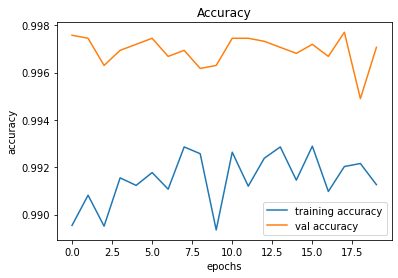

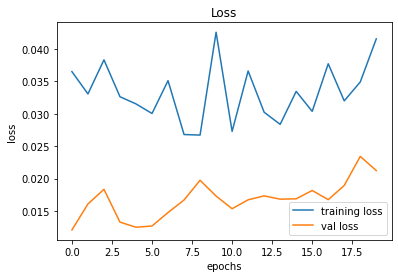

In [37]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))

#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [41]:
#Predicting with the test data
y_test=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/Test.csv")
labels=y_test['Path'].to_numpy()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('/content/drive/MyDrive/ColabNotebooks/test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict(X_test)
classes_x=np.argmax(pred,axis=1)

In [43]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, classes_x)

0.9806017418844022

Kiểm tra với một số hình ảnh

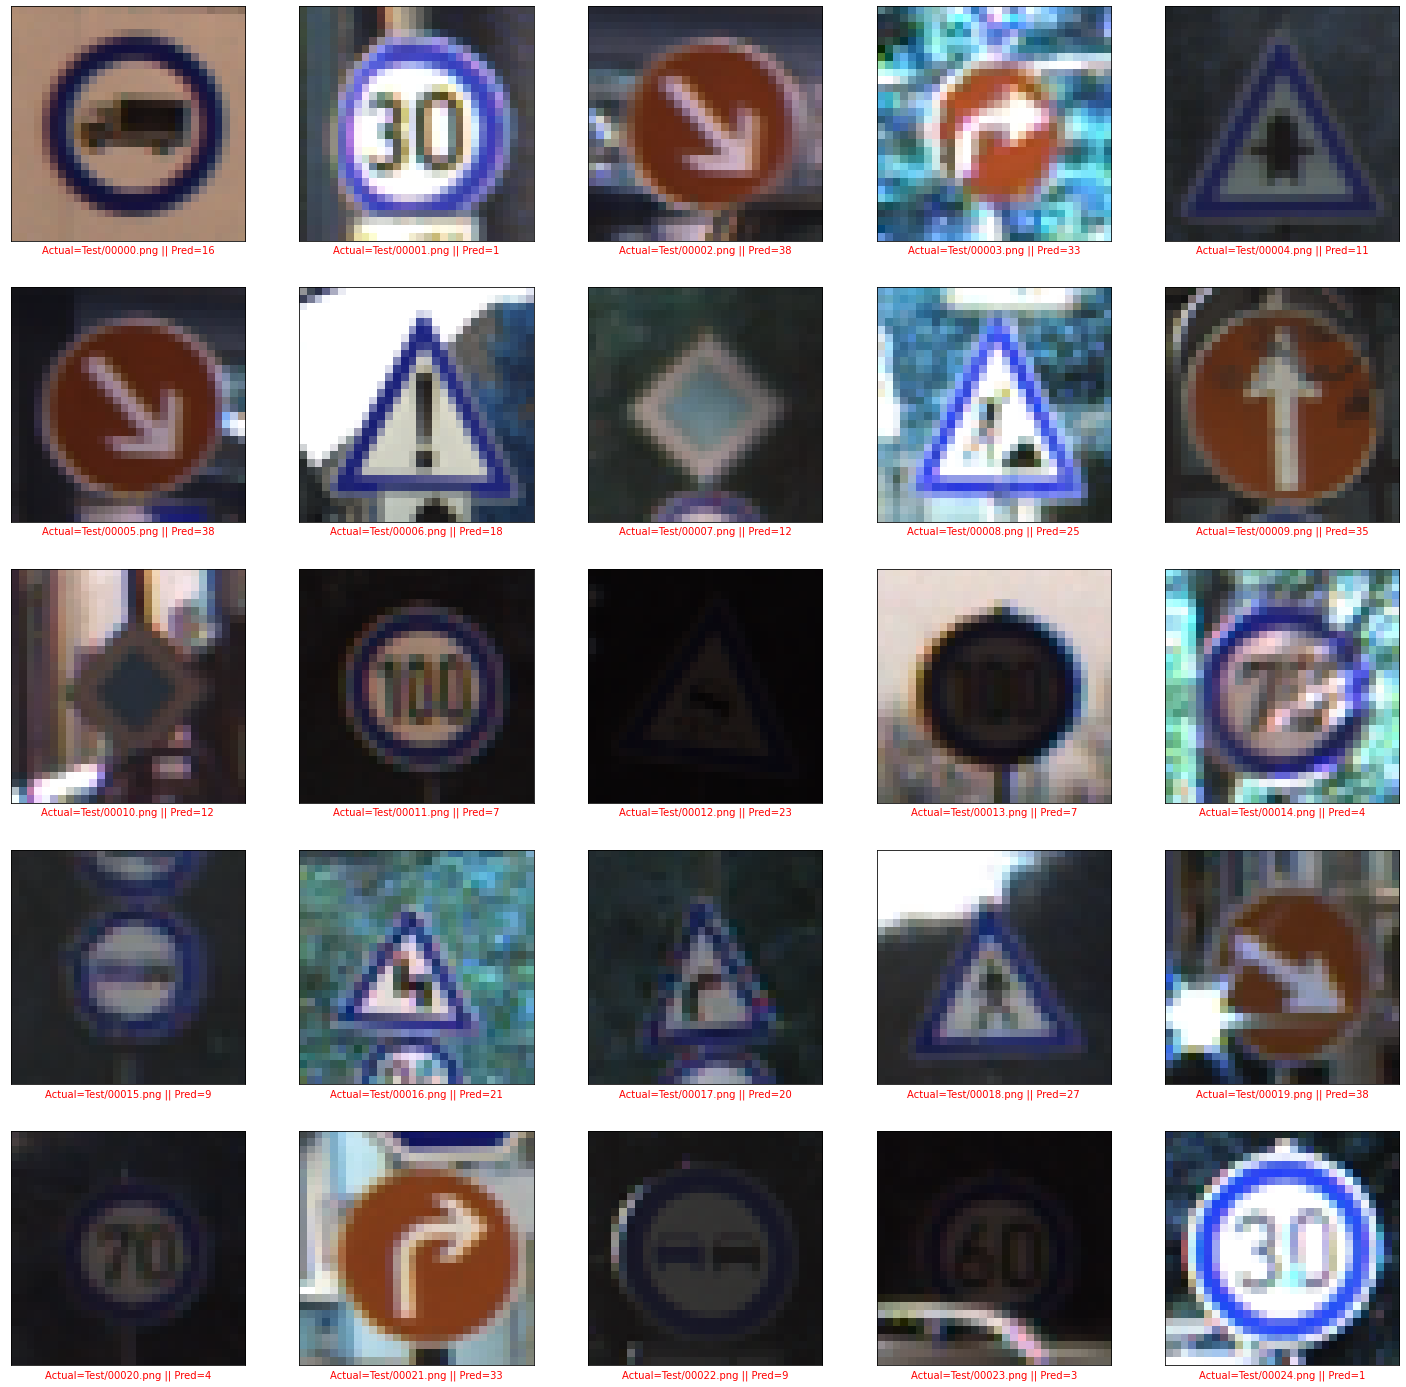

In [45]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = classes_x[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()